# stack-overflow-data Classifiation

In [26]:
#basic library
import numpy as np
import pandas as pd

#Visualization of data
import matplotlib.pyplot as plt
import seaborn as sns

#deep-learning library
import keras
import tensorflow as tf


from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical

In [79]:
df = pd.read_csv("..//data//stack-overflow-data.csv", delimiter=',', encoding='latin-1')
df.head(10)

,post,tags
0,what is causing this behavior in our c# datet...,c#
1,have dynamic html load as if it was in an ifra...,asp.net
2,how to convert a float value in to min:sec i ...,objective-c
3,.net framework 4 redistributable just wonderi...,.net
4,trying to calculate and print the mean and its...,python
5,how to give alias name for my website i have ...,asp.net
6,window.open() returns null in angularjs it wo...,angularjs
7,identifying server timeout quickly in iphone ...,iphone
8,unknown method key error in rails 2.3.8 unit ...,ruby-on-rails
9,from the include how to show and hide the con...,angularjs


label
Number of language catagory


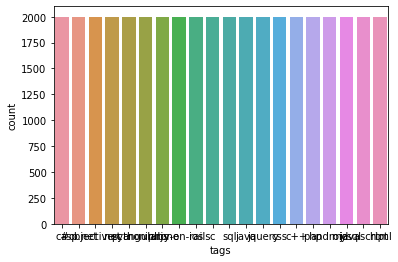

In [80]:
sns.countplot(df.tags)
print("label")
print("Number of language catagory")

In [4]:
df.tags.value_counts()

c                2000
css              2000
java             2000
sql              2000
jquery           2000
html             2000
ruby-on-rails    2000
python           2000
objective-c      2000
angularjs        2000
c++              2000
.net             2000
iphone           2000
c#               2000
mysql            2000
android          2000
javascript       2000
ios              2000
php              2000
asp.net          2000
Name: tags, dtype: int64

In [83]:
train_size = int(len(df) * .8)
train_posts = df['post'][:train_size]
train_tags = df['tags'][:train_size]

test_posts = df['post'][train_size:]
test_tags = df['tags'][train_size:]

print("Size of data: ", train_posts.shape, test_posts.shape)

Size of data:  (32000,) (8000,)


In [84]:
train_tags.value_counts()

ios              1632
mysql            1619
python           1618
c                1612
angularjs        1612
css              1611
.net             1609
asp.net          1608
php              1605
java             1605
c++              1602
javascript       1592
c#               1591
objective-c      1588
sql              1588
iphone           1586
html             1582
ruby-on-rails    1581
jquery           1581
android          1578
Name: tags, dtype: int64

In [85]:
train_posts

0        what is causing this behavior  in our c# datet...
1        have dynamic html load as if it was in an ifra...
2        how to convert a float value in to min:sec  i ...
3        .net framework 4 redistributable  just wonderi...
4        trying to calculate and print the mean and its...
5        how to give alias name for my website  i have ...
6        window.open() returns null in angularjs  it wo...
7        identifying server timeout quickly in iphone  ...
8        unknown method key  error in rails 2.3.8 unit ...
9        from the include  how to show and hide the con...
10       when we need interface c# <blockquote>    <str...
11       how to install .ipa on jailbroken iphone over ...
12       dynamic textbox text - asp.net  i m trying to ...
13       rather than bubblesorting these names...the pr...
14       site deployed in d: drive and uploaded files a...
15       connection in .net  i got     <blockquote>    ...
16       how to subtract 1 from an int  how do i subtra.

In [86]:
max_words = 1000
tokenize = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenize.fit_on_texts(train_posts) # only fit on train

# x_train = tokenize.texts_to_matrix(train_posts)
# x_test = tokenize.texts_to_matrix(test_posts)

In [87]:
X_train = tokenize.texts_to_matrix(train_posts)
X_test = tokenize.texts_to_matrix(test_posts)

In [88]:
X_train[0]

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [89]:
encoder = LabelEncoder()
encoder.fit(train_tags)

y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [90]:
num_classes = np.max(y_train) + 1

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [202]:
#build model 
def classificaon_model():
    model =  Sequential()
    model.add(Dense(512, input_shape=(max_words,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
#     model.add(Dense(256))
#     model.add(Activation('relu'))
#     model.add(Dropout(0.2))
    model.add(Dense(num_classes))
    model.add(Dropout(0.2))
    model.add(Activation('softmax'))
    
    return model

In [199]:
#build model 
def classificaon_model_v1():
    model =  Sequential()
    model.add(Embedding(input_dim=max_words, input_length = X_train.shape[1], output_dim=num_classes))
    model.add(LSTM(100, dropout=0.7, recurrent_dropout=0.7))
    model.add(Dense(512, input_shape=(max_words,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    return model

In [200]:
def LSTM_model():
   # def RNN():
    inputs = Input(name='inputs', shape=[max_words])
    layer = Embedding(max_words, 50, input_length=max_words)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256, name = 'FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(num_classes, name='out_layer')(layer)
    layer = Activation('softmax')(layer)
    model = Model(inputs=inputs,outputs=layer)
    
    return model

In [186]:
model = classificaon_model() #LSTM_model()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               512512    
_________________________________________________________________
activation_39 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_40 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 20)                5140      
__________

In [187]:
print("Shape of data:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Shape of data: (32000, 1000) (32000, 20) (8000, 1000) (8000, 20)


In [188]:
batch_size = 128
epochs = 20

In [ ]:
#history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=batch_size, shuffle=True)

Train on 32000 samples, validate on 8000 samples
Epoch 1/20
32000/32000 [==============================] - 4s 118us/step - loss: 0.1479 - acc: 0.9280 - val_loss: 1.4234 - val_acc: 0.7987
Epoch 2/20
32000/32000 [==============================] - 4s 115us/step - loss: 0.1466 - acc: 0.9311 - val_loss: 1.4163 - val_acc: 0.7960
Epoch 3/20
32000/32000 [==============================] - 4s 115us/step - loss: 0.1492 - acc: 0.9298 - val_loss: 1.4209 - val_acc: 0.7980
Epoch 4/20
32000/32000 [==============================] - 4s 116us/step - loss: 0.1462 - acc: 0.9313 - val_loss: 1.4289 - val_acc: 0.7994
Epoch 5/20
32000/32000 [==============================] - 4s 114us/step - loss: 0.1413 - acc: 0.9318 - val_loss: 1.4503 - val_acc: 0.8024
Epoch 6/20
32000/32000 [==============================] - 4s 113us/step - loss: 0.1404 - acc: 0.9333 - val_loss: 1.4194 - val_acc: 0.7995
Epoch 7/20
32000/32000 [==============================] - 4s 114us/step - loss: 0.1465 - acc: 0.9307 - val_loss: 1.4069 - v

In [195]:
score = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

8000/8000 [==============================] - 0s 24us/step
Test accuracy: 0.80025


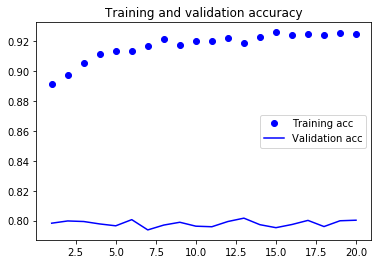

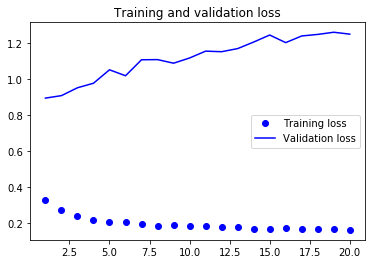

In [196]:
#accuracy visulatization
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [197]:
#real evulation
txt = ["Dot net core open source web framework, that which has more performance than ASP.NET. It developed and implemented by Microsoft community. Subsequently it is a expandable and runs on .NET framework and cross platform .NET core."]
seq = tokenize.texts_to_matrix(txt)
pred = model.predict(seq)
print(pred, "class:", np.argmax(pred))

[[1.79389417e-07 1.71590809e-17 6.03169070e-15 9.99999762e-01
  9.64588216e-18 1.43245944e-17 5.35732623e-18 5.83492170e-18
  2.43728160e-13 1.04259416e-18 1.09316595e-20 2.99237395e-19
  1.15467293e-16 1.25484602e-14 2.66928669e-15 1.32472626e-19
  2.06976363e-14 4.97909414e-21 1.74918321e-18 5.88600552e-14]] class: 3


In [193]:
set(test_tags)

{'.net',
 'android',
 'angularjs',
 'asp.net',
 'c',
 'c#',
 'c++',
 'css',
 'html',
 'ios',
 'iphone',
 'java',
 'javascript',
 'jquery',
 'mysql',
 'objective-c',
 'php',
 'python',
 'ruby-on-rails',
 'sql'}